In [120]:
# import necessary library
import pandas as pd # Pandas for data manipulation and analysis using tables (DataFrames)
import numpy as np # Numpy for numerical computing and efficient array operations.
import matplotlib.pyplot as plt #matplotlib.pyplot: Used to create a wide range of basic visualizations
import seaborn as sns # seaborn: Advance visualizations for statistics.
import warnings as wr
wr.filterwarnings("ignore") # warnings: To handle unnecessary warnings

In [121]:
# Load the dataset
df = pd.read_csv(r"C:\Users\Din islam\Downloads\diabetics-prediction-\diabetes.csv")

In [122]:
# Here, my dataset is in csv format. So, I used read_csv() function to  load the dataset

In [123]:
# To see the first 5 row from the dataset
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [124]:
# Checking the shape of the dataset to see how many rows and columns in the dataset
df.shape

(768, 9)

#### In this, dataset there are 768 rows and 9 columns

# - Data Preprocessing & Cleaning


In [125]:
### To know the overall information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Here, in the dataset , there is no missing value at any feature and not categorical feature.

In [126]:
#Checking null value Present or not by using pandas
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### df.isnull().sum() shows how many null value present in each feature

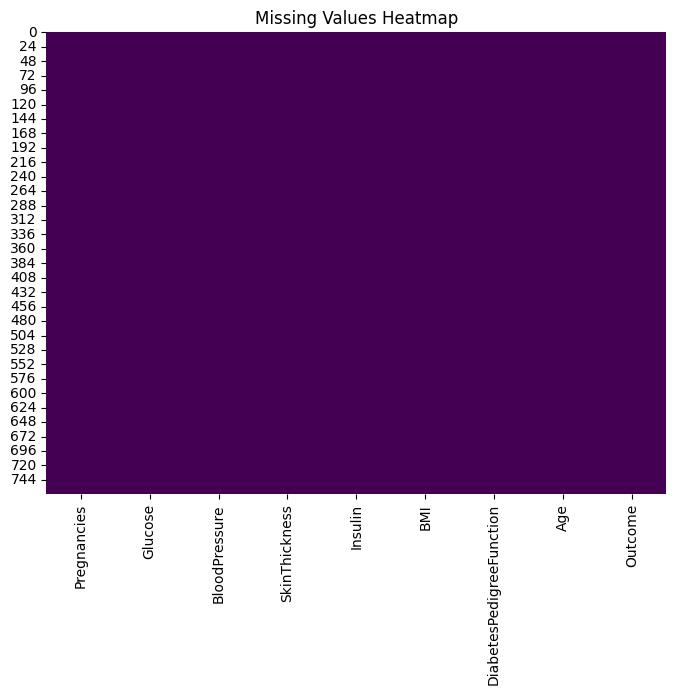

In [127]:
# visualize the null value by using heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


In [128]:
print("From the heatmap , we can clearly see that , there is no null value in the dataset")

From the heatmap , we can clearly see that , there is no null value in the dataset


In [129]:
# To see overall statistical description
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### From the description , I can see that in Glucose, BloodPressure, SkinThickness, Insulin, BMI columns minimum value is zero which is actully not possible for any person.

In [130]:
# Let's see how many zero containing rows are there
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
zero_rows = df[(df[zero_cols] == 0).any(axis=1)]
print("Total rows with at least one zero in specified columns:", zero_rows.shape[0])

Total rows with at least one zero in specified columns: 376


### Here, 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI' features total containing 376 zero containing rows.From my inspection , I can say that, that rows were missing while collecting data.And we should assume them missing values.

In [131]:

# Replace 0s with NaNs
df[zero_cols] = df[zero_cols].replace(0, np.nan)

# Check how many missing values per column
print(df[zero_cols].isnull().sum())



Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


In [132]:
# Impute using median (more robust than mean for skewed data)
for col in zero_cols:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

# Check to confirm all missing values are filled
print(df[zero_cols].isnull().sum())

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


In [133]:
# Checking duplicates 
df.duplicated().sum()

np.int64(0)

## In this dataset, there is no duplicate value.

In [134]:
# View data types of all columns
print(df.dtypes)


Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


# Exploratory Data Analysis

In [135]:
# Checking Pregnancies column insight and visualize
df["Pregnancies"].value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
17      1
15      1
Name: count, dtype: int64

In [136]:
# To see the how many unique value in pregnancies column
df.Pregnancies.nunique()

17

In [137]:
# To see the unique value of the pregnancies columns
df.Pregnancies.unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14])

In [138]:
df.groupby('Outcome')['Pregnancies'].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,500.0,3.298000,3.017185,0.0,1.00,2.0,5.0,13.0
1,268.0,4.865672,3.741239,0.0,1.75,4.0,8.0,17.0


### By describing the pregnancies feature, I can say that, here 500 people who does not have diabetes and there min pregnancy 0 and maximum pregnancies 13.
### And 268 people have diabetes and their minimum pregnancies 0 and maximum 17


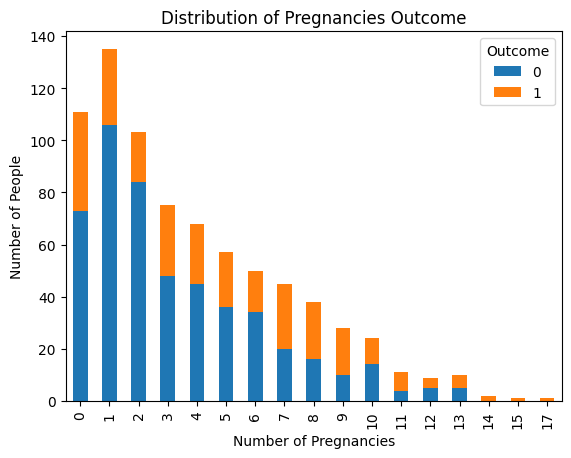

In [139]:
# Visulize the Pregnancies feature with Outcome by Stack bar plot
pd.crosstab(df['Pregnancies'], df['Outcome']).plot(kind='bar', stacked=True)
plt.xlabel('Number of Pregnancies')
plt.ylabel('Number of People')
plt.title('Distribution of Pregnancies Outcome')
plt.legend(title='Outcome')
plt.show()


### From the Stack Bar plot , I can understand that, in pregnancies 0,1,2 , there are less diabetes tendency,
### As Pregnancies increases, diabetes also stat increasing.
### When pregnancies is 7 - 9, number of diabetes patient is maximum. 
### So, I can wrap up to say that, more pregnancies causes more diabetes.

In [140]:
# Checking impact of glucose in diabetes
df.groupby('Outcome')['Glucose'].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,500.0,110.682000,24.707201,44.0,93.0,107.5,125.0,197.0
1,268.0,142.130597,29.568839,78.0,119.0,140.0,167.0,199.0


### In the description of Glucose and outcome, it can say that the non-diabetes people have average glocuse is 110.68 , minimum 44.0 and maximum 197.
### And the diabetes people have average glocuse 142.13 , minimum 78.0 and maximum 199.


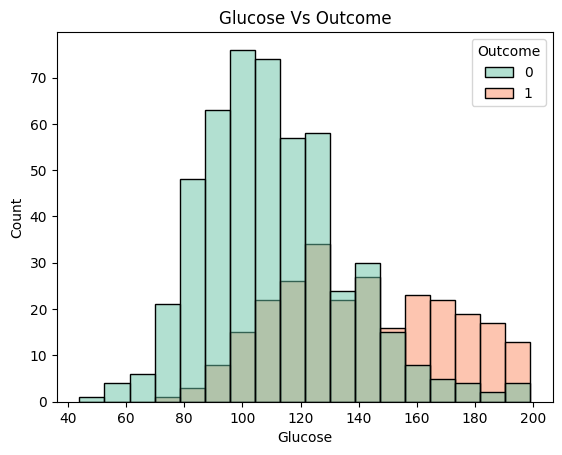

In [141]:
# Visualize the Glocuse and Outcome by histplot
sns.histplot(data=df,x='Glucose',hue='Outcome',palette='Set2')
plt.title("Glucose Vs Outcome")
plt.show()

### From the hisplot, it's clearly seen that , the person who have glucose level is more than 150, are affected to diabetes.

In [142]:
# Checking the impact of BloodPressure,SkinThickness,Insulin in diabetes
bsi_des = ['BloodPressure', 'SkinThickness', 'Insulin']
for i in bsi_des:
    print(f"\nDescriptive stats for {i} by Outcome:")
    print(df.groupby('Outcome')[i].describe())


Descriptive stats for BloodPressure by Outcome:
         count       mean        std   min   25%   50%   75%    max
Outcome                                                            
0        500.0  70.920000  11.929385  24.0  63.5  72.0  78.0  122.0
1        268.0  75.123134  11.951672  30.0  68.0  74.0  82.0  114.0

Descriptive stats for SkinThickness by Outcome:
         count       mean       std  min   25%   50%   75%   max
Outcome                                                         
0        500.0  27.726000  8.552966  7.0  22.0  29.0  31.0  60.0
1        268.0  31.686567  8.662994  7.0  29.0  29.0  36.0  99.0

Descriptive stats for Insulin by Outcome:
         count        mean         std   min    25%    50%     75%    max
Outcome                                                                  
0        500.0  127.792000   74.447469  15.0   95.0  125.0  125.00  744.0
1        268.0  164.701493  100.932249  14.0  125.0  125.0  167.25  846.0


### The diabetes person have average 75.12 mmHg bloodPressure with standard deviation 11.95 also maximum 114 and minimum 30.0 and the non diabetes person have average 70.92 mmHg bloodPressure with standard deviation 11.92 and maximum 122 and minumum 24.0.
### The diabetes person's mean thickness is 31.68 with minimum thickness 7.0 and maximum thickness 99 also standard deviation 8.66 . On the other hand, the non-diabetes person mean thickness is 27.72 with  std 8.55 and minimum thickness is 7.0 and maximum 60.
### In the Insulin feature, for non-diabetes person , mean insulin is 127.79 , std 74.44 , with maximum 774. Diabetes person's have mean 164.70 , std 100.932249 , and maximum insulin 846.
## That means in diabetes , the features have enough impact.

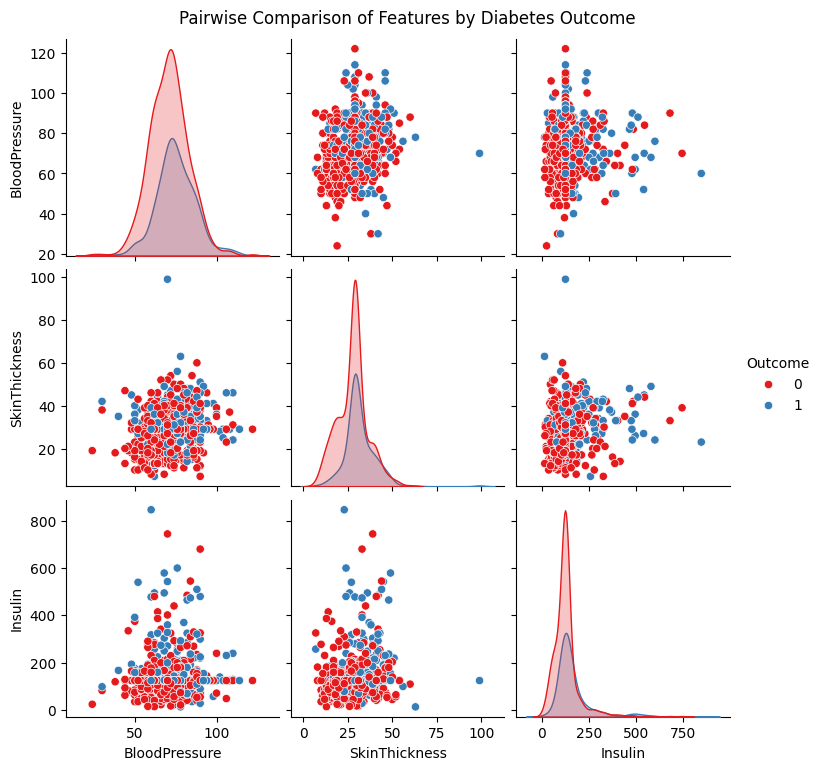

In [143]:
# Visualize BloodPressure, SkinThickness, Insulin impact in Diabetes

sns.pairplot(df, vars=['BloodPressure', 'SkinThickness', 'Insulin'], hue='Outcome', palette='Set1', diag_kind='kde')
plt.suptitle('Pairwise Comparison of Features by Diabetes Outcome', y=1.02)
plt.show()


### Red represents outcome 0 (non-diabetic) and Blue represents outcome 1 (diabetic) 

### BloodPressure: Diabetics peak around 60–70 mmHg vs. 70–80 mmHg in non-diabetics → slight downward shift.
### SkinThickness: Diabetics show wider spread, slight multimodal pattern → mild class distinction.
### Insulin: Diabetics tend to have significantly higher insulin levels (peaking around 200), while non-diabetics mostly cluster much lower → strong separation potential.

### Scatter Patterns: No strong visual boundary between diabetic and non-diabetic groups in any pairwise combination, but combined they may still be useful for prediction.
### Among the features, Insulin shows the clearest distinction between classes, making it a highly informative predictor alongside BloodPressure and SkinThickness.



In [144]:
# BMI vs Outcome
df["BMI"].value_counts()

BMI
32.3    14
32.0    13
31.6    12
31.2    12
33.3    10
        ..
49.6     1
24.1     1
41.2     1
49.3     1
46.3     1
Name: count, Length: 247, dtype: int64

In [145]:
df["BMI"].describe()

count    768.000000
mean      32.455208
std        6.875177
min       18.200000
25%       27.500000
50%       32.300000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

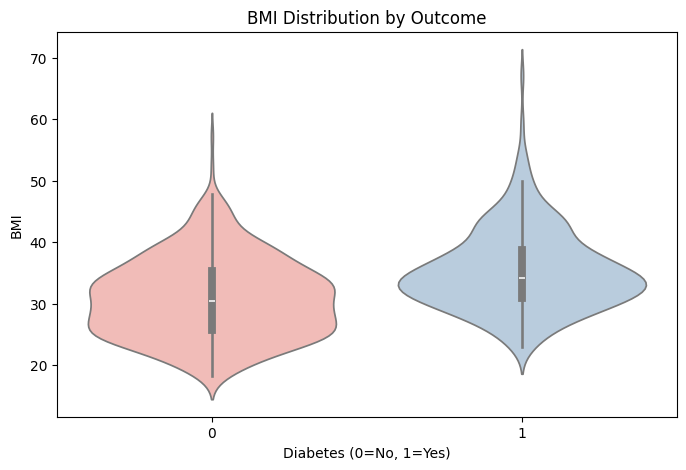

In [146]:
# Visualize BMI using violiting plot
plt.figure(figsize=(8,5))
sns.violinplot(x='Outcome', y='BMI', data=df, palette='Pastel1')
plt.title('BMI Distribution by Outcome')
plt.xlabel('Diabetes (0=No, 1=Yes)')
plt.ylabel('BMI')
plt.show()

### The plot shows that BMI distributions for diabetics and non-diabetics are fairly similar, with slightly wider variation among non-diabetics. The medians align closely, suggesting BMI alone may offer limited separation power, though its spread could still contribute to broader predictive insights.



In [147]:
# DiabetesPedigreeFunction vs Outcome
df.groupby('Outcome')['DiabetesPedigreeFunction'].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,500.0,0.429734,0.299085,0.078,0.22975,0.336,0.56175,2.329
1,268.0,0.550500,0.372354,0.088,0.26250,0.449,0.72800,2.420


### Diabetic patients have higher and more varied DiabetesPedigreeFunction values than non-diabetics. This suggests a stronger genetic link to diabetes in that group.


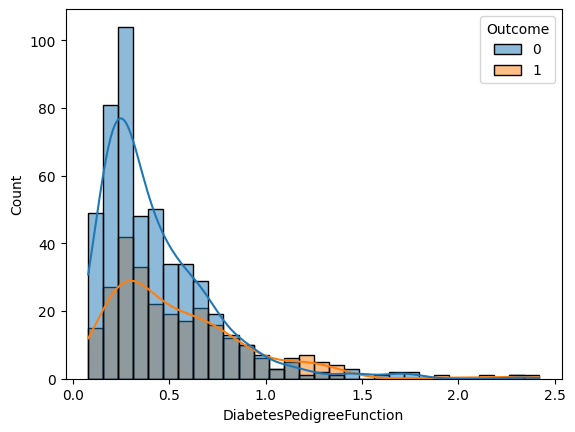

In [148]:
# Visualize the DiabetesPedigreeFunction
sns.histplot(data=df, x='DiabetesPedigreeFunction', hue='Outcome', kde=True, bins=30)
plt.show()

### This histogram with KDE overlay compares the distribution of Diabetes Pedigree Function between non-diabetic (Outcome = 0) and diabetic (Outcome = 1) individuals.
### Summary: Most values fall between 0 and 1 for both groups.Outcome = 0 has a peak density around 0.2, whileOutcome = 1 peaks around 0.4, showing a shift to higher values. Diabetic cases (orange) are more spread out, with some high values beyond 1.5.
### Key Insight:Diabetic individuals tend to have higher and more varied Diabetes Pedigree Function values, hinting at a stronger genetic predisposition in this group.


In [149]:
# Impact of Age on Diabetes
df["Age"].sort_values()

736    21
738    21
721    21
60     21
290    21
       ..
123    69
684    69
666    70
453    72
459    81
Name: Age, Length: 768, dtype: int64

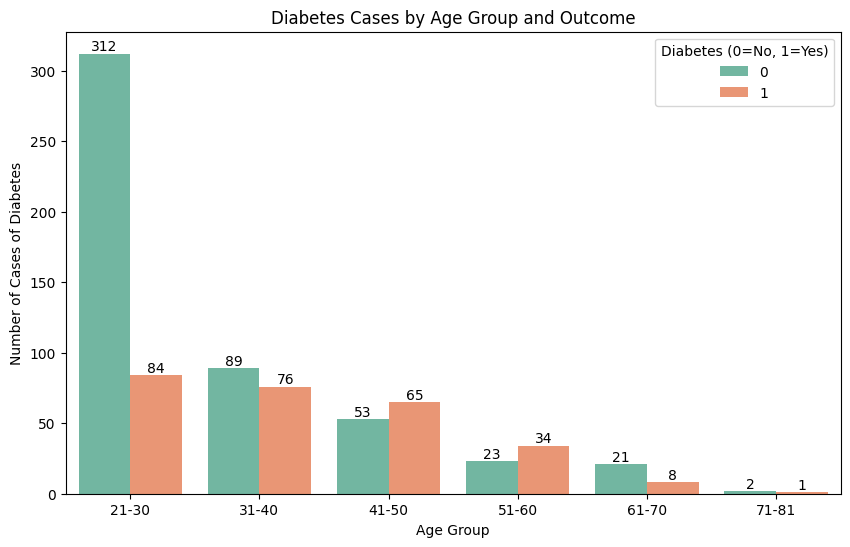

In [150]:
# Visualize the Age 

plt.figure(figsize=(10,6))
age_bins = [21, 30, 40, 50, 60, 70, 82]
age_labels = ['21-30', '31-40', '41-50', '51-60', '61-70', '71-81']
age_groups = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

ax = sns.countplot(x=age_groups, hue=df['Outcome'], palette='Set2')
for p in ax.containers:
    ax.bar_label(p)
plt.title('Diabetes Cases by Age Group and Outcome')
plt.xlabel('Age Group')
plt.ylabel('Number of Cases of Diabetes')
plt.legend(title='Diabetes (0=No, 1=Yes)')
plt.show()


### The graph shows that diabetes prevalence increases with age. While most individuals without diabetes are in the 21–30 group, the proportion of diabetic cases rises steadily across older age bins—especially between ages 41–60—highlighting a higher risk of diabetes in middle to older age groups.


In [151]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# Check for encoding need or not

In [152]:
df.select_dtypes(include='number').columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## Here, I can see that, all features are numeric type. So there is no need of encoding

# Outliers Handling

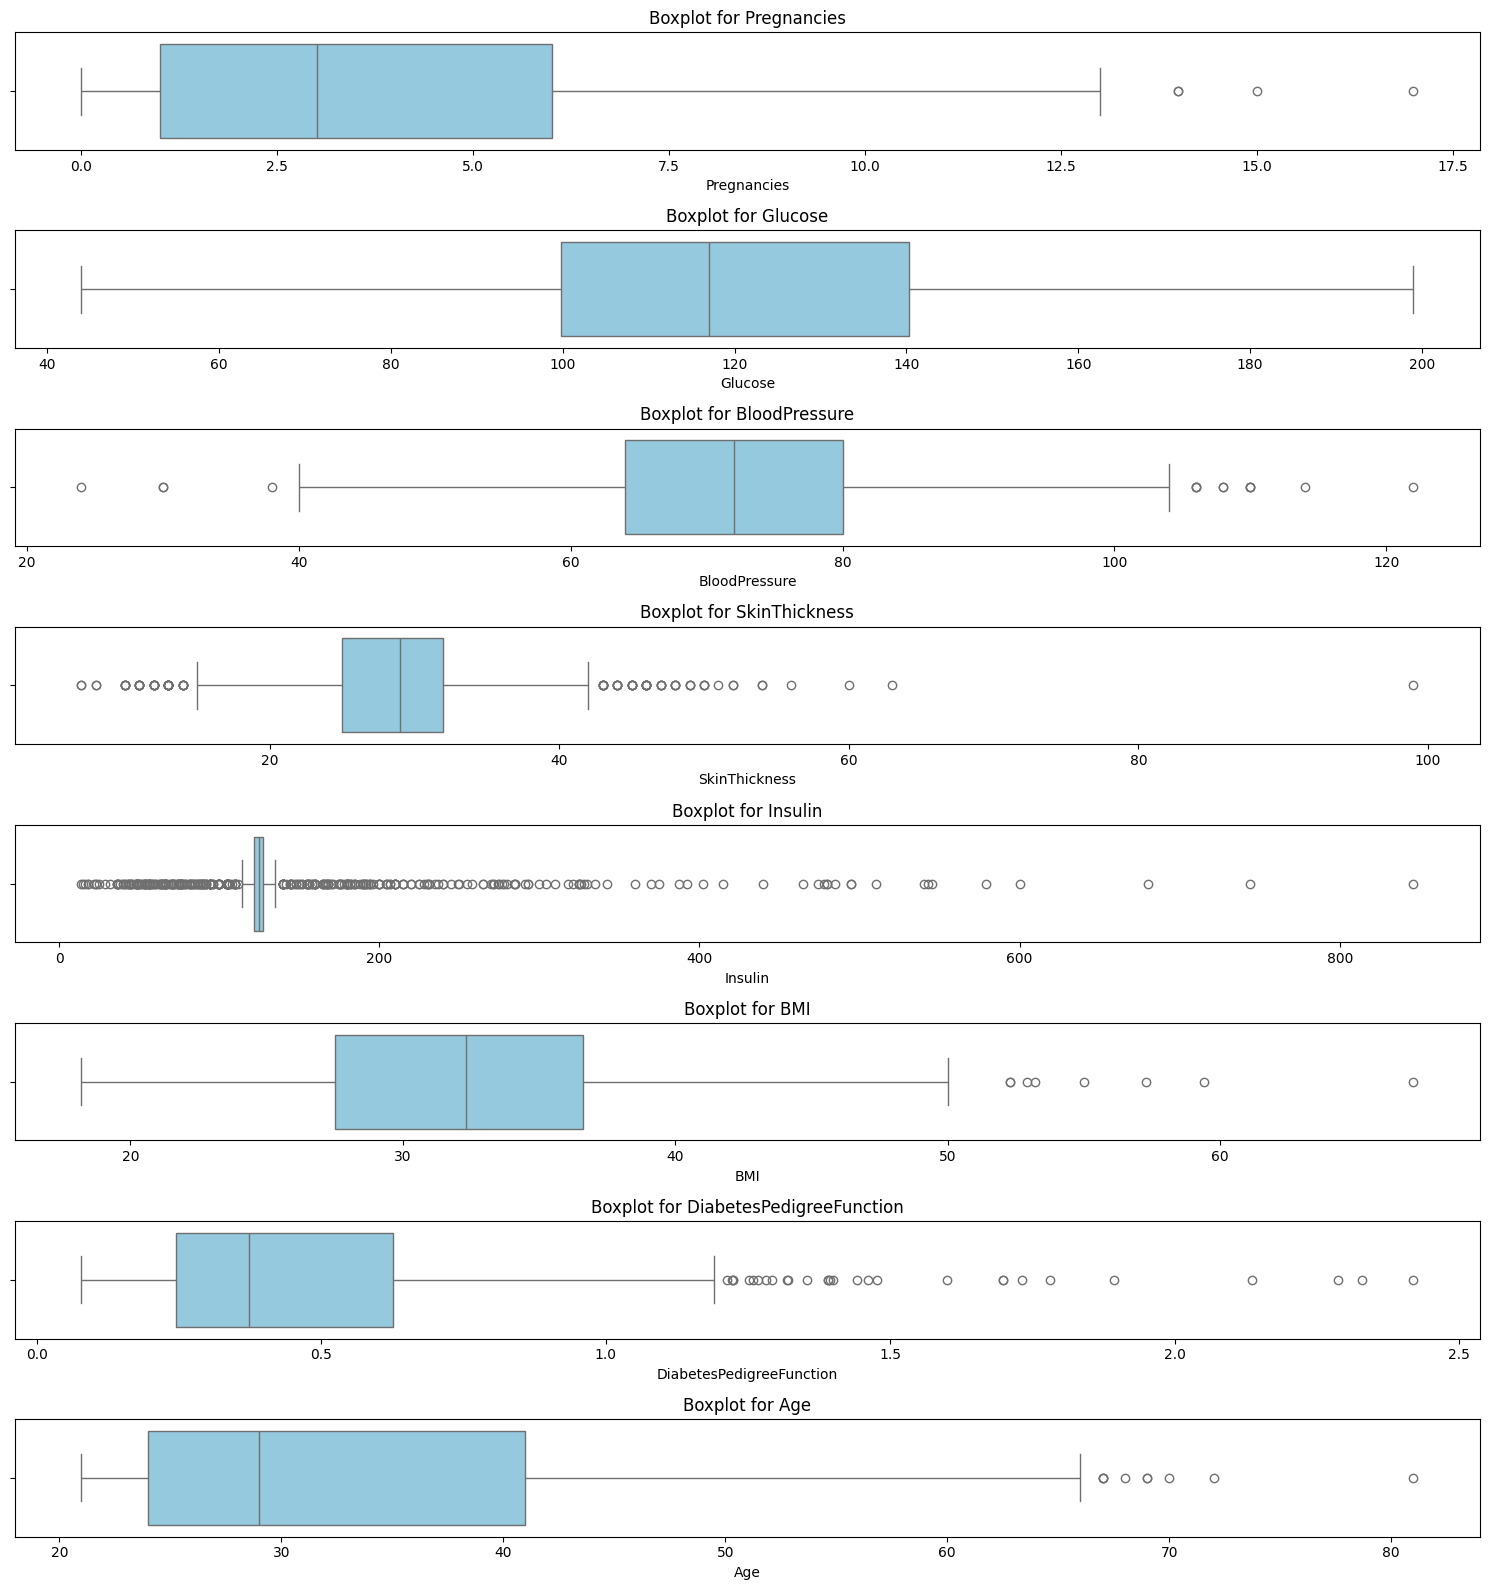

In [153]:
num_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

# Set up the figure
plt.figure(figsize=(15, 2 * len(num_cols)))

# Loop through each numerical column and plot its boxplot
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot for {col}')
    plt.tight_layout()

plt.show()

#### The boxplots show **widespread outliers** in features like *Insulin*, *SkinThickness*, and *Pregnancies*, with less extreme dispersion in features like *BMI* and *BloodPressure*. This suggests inconsistent or skewed measurements that could affect model performance.


In [154]:

df.shape

(768, 9)

# Remove outliers

In [155]:
filtered_df = df.copy()
for col in num_cols:
        q1 = np.quantile(df[col], 0.25)
        q3 = np.quantile(df[col], 0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr) 
        upper_bound = q3 + (1.5 * iqr)

        filtered_df = filtered_df[(filtered_df[col] <= upper_bound)]

In [156]:
# Show the shape
filtered_df.shape

(532, 9)

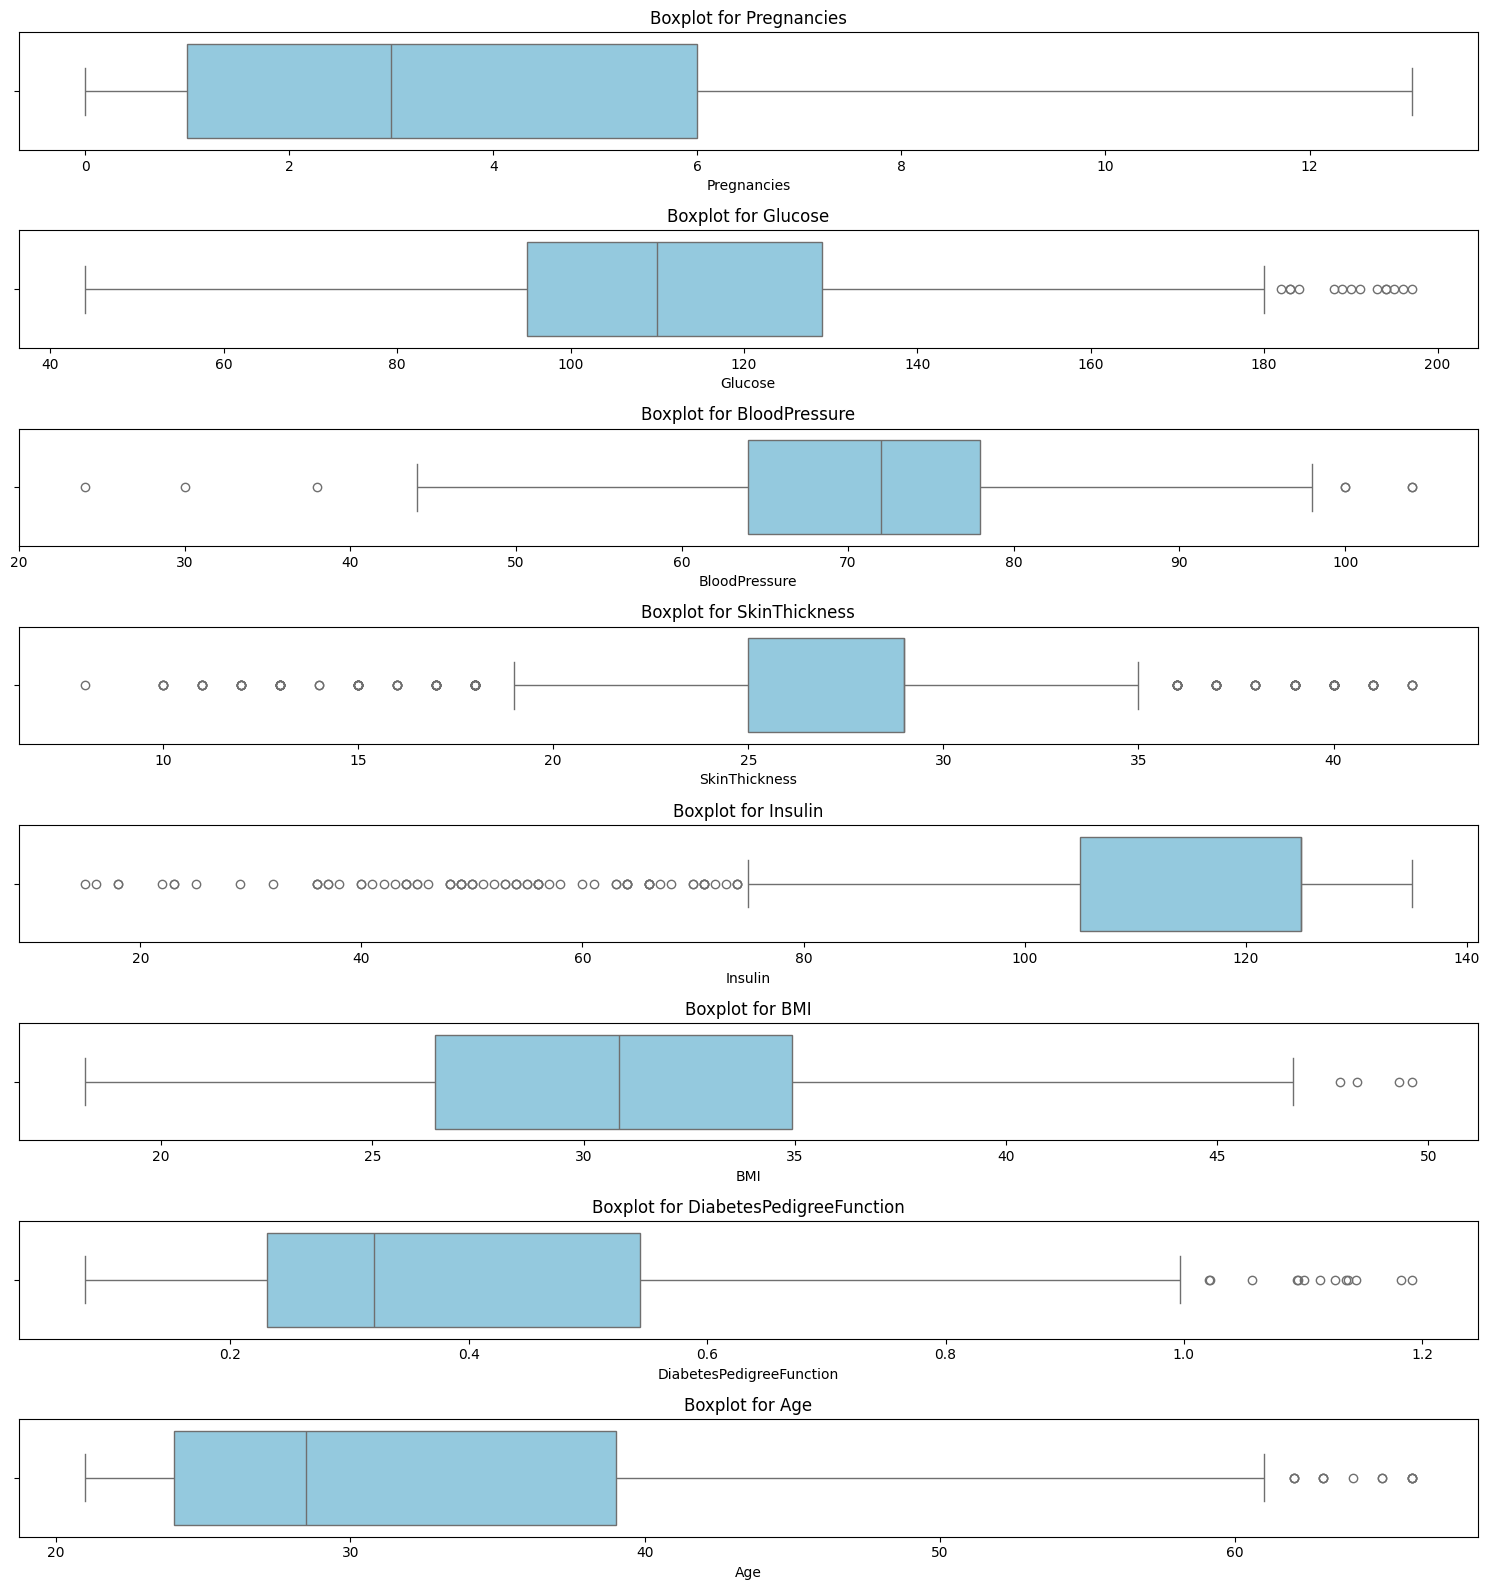

In [157]:
plt.figure(figsize=(15, 2 * len(num_cols)))

# Loop through each numerical column and plot its boxplot
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)
    sns.boxplot(x= filtered_df[col], color='skyblue')
    plt.title(f'Boxplot for {col}')
    plt.tight_layout()
plt.show()

"""## I remove outlier using inter quantitle method and I remove outliers from upper bound."""

In [158]:
filtered_df["Outcome"].value_counts()

Outcome
0    378
1    154
Name: count, dtype: int64

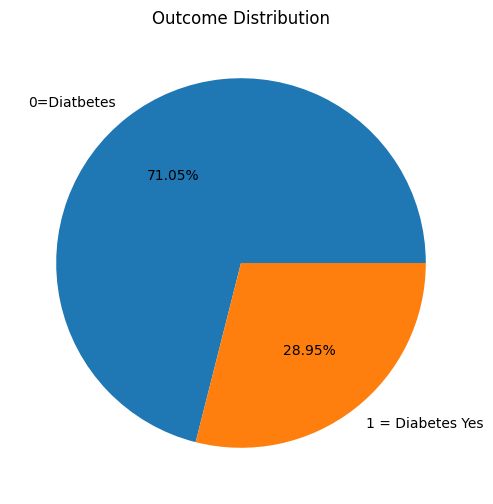

In [159]:
plt.figure(figsize=(6,6))
plt.pie(filtered_df["Outcome"].value_counts(),labels=["0=Diatbetes","1 = Diabetes Yes"],autopct='%.2f%%')
plt.title("Outcome Distribution")
plt.show()

#### From the pie chart, I can see that in the target feature Non-diabetes person's are 71.05% and diabetes person's are 28.95%. That means the dataset is imbalanced. If I work with this dataset, it will be biased to the 0 class. So I have to balanced the dataset first.

## Correlation matrix

In [160]:
# to see correlations of all features with target feature
filtered_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.151645,0.208598,0.221081,0.213538,0.063883,-0.014276,0.536318,0.219680
Glucose,0.151645,1.000000,0.259922,0.145508,0.325801,0.172165,0.010349,0.299333,0.497101
BloodPressure,0.208598,0.259922,1.000000,0.217031,0.169451,0.257210,0.022850,0.362733,0.188050
SkinThickness,0.221081,0.145508,0.217031,1.000000,0.285472,0.498778,-0.013321,0.202171,0.222369
Insulin,0.213538,0.325801,0.169451,0.285472,1.000000,0.123569,-0.059207,0.283264,0.249367
BMI,0.063883,0.172165,0.257210,0.498778,0.123569,1.000000,0.118601,0.079190,0.297794
DiabetesPedigreeFunction,-0.014276,0.010349,0.022850,-0.013321,-0.059207,0.118601,1.000000,0.014782,0.147682
Age,0.536318,0.299333,0.362733,0.202171,0.283264,0.079190,0.014782,1.000000,0.242544
Outcome,0.219680,0.497101,0.188050,0.222369,0.249367,0.297794,0.147682,0.242544,1.000000


## Visualize the correlation matrix to see how features are correlated with target feature - Outcome

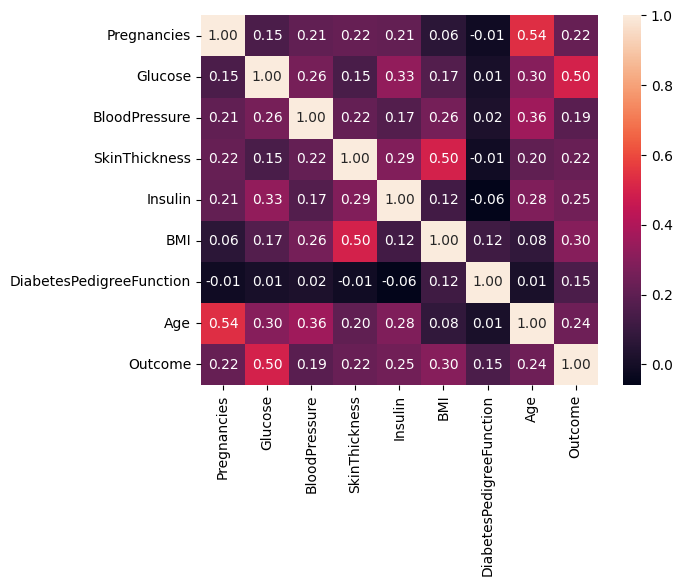

In [161]:
sns.heatmap(filtered_df.corr(),annot=True,fmt='.2f')
plt.show()

In [162]:
print("Features Most Positively Correlated with Outcome:\n- Glucose (0.49): This shows the strongest positive correlation, meaning higher glucose levels are quite indicative of a positive diabetes outcome.\n- BMI (0.31): Body mass index also has a notable positive correlation, \nsuggesting that higher BMI is associated with increased diabetes risk.\n Moderate Positive Correlations:\n- Age (0.24): Older individuals are slightly more likely to test positive.\n- Pregnancies (0.22): More pregnancies appear linked to higher diabetes risk.\n- SkinThickness (0.21) and Insulin (0.20): These have mild relationships with the outcome,\n potentially contributing to the diagnosis but not dominant.\n Weakest Correlations:\n- BloodPressure (0.17) and DiabetesPedigreeFunction (0.17): These have the weakest correlations,\n so they may not be strong predictors on their own.")

Features Most Positively Correlated with Outcome:
- Glucose (0.49): This shows the strongest positive correlation, meaning higher glucose levels are quite indicative of a positive diabetes outcome.
- BMI (0.31): Body mass index also has a notable positive correlation, 
suggesting that higher BMI is associated with increased diabetes risk.
 Moderate Positive Correlations:
- Age (0.24): Older individuals are slightly more likely to test positive.
- Pregnancies (0.22): More pregnancies appear linked to higher diabetes risk.
- SkinThickness (0.21) and Insulin (0.20): These have mild relationships with the outcome,
 potentially contributing to the diagnosis but not dominant.
 Weakest Correlations:
- BloodPressure (0.17) and DiabetesPedigreeFunction (0.17): These have the weakest correlations,
 so they may not be strong predictors on their own.


# Split the dataset into input features and targetted feature

In [163]:
X = filtered_df.drop(columns=["Outcome"])
y = filtered_df["Outcome"]

In [164]:
X.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
5,5,116.0,74.0,29.0,125.0,25.6,0.201,30


In [165]:
y.head()

0    1
1    0
2    1
3    0
5    0
Name: Outcome, dtype: int64

### Here , outcome is our target feature , that's why we keep it in y , rest of them inside X. They are input features.

# Train_test_split,scaling and balancing the dataset

In [166]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Split data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size = 0.2, random_state = 42)
# Scale X_train only
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  

# DO NOT SCALE y_train
# Apply SMOTE
sm = SMOTE(random_state = 42)
X_resampled, y_resampled = sm.fit_resample(X_train_scaled, y_train)

# Transform X_test (not fit_transform)
X_test_scaled = scaler.transform(X_test)


#### spliting the training data and testing data 
#### test data 20% and train data 80%
#### random state = 20 means data will be fixed for each time I run it.

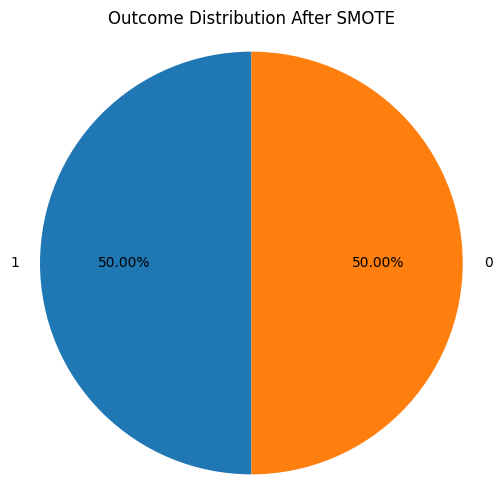

In [167]:

y_res_series = pd.Series(y_resampled)

# Count class frequencies
class_counts = y_res_series.value_counts()

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(class_counts, labels=class_counts.index, autopct='%.2f%%', startangle=90)
plt.title("Outcome Distribution After SMOTE")
plt.axis('equal')
plt.show()


# Now the outcome column is balanced.

# Model training

In [168]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [169]:

clfs = {
 'lrc': LogisticRegression(
        max_iter=1000,
        penalty='l2',
        C=1.0,
        solver='lbfgs',
        random_state=42
 ),
 
 'dt': DecisionTreeClassifier(
        criterion='gini',
        max_depth=5,
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=42
 ),
 
'rf': RandomForestClassifier(
       n_estimators=100,
       max_features='sqrt',
       min_samples_split=2,
       min_samples_leaf=1,
       bootstrap=True,
       random_state=42,
 ),
 
 'gdbc': GradientBoostingClassifier(
       n_estimators=100,
       learning_rate=0.1,
       max_depth=3,
       subsample=1.0,
       random_state=42
 ),
 
 'knc': KNeighborsClassifier(
       n_neighbors=5,
       weights='uniform',
       metric='minkowski'
),

'svc': SVC(
       C=1.0,
       kernel='rbf',
       gamma='scale',
       probability=True,
       random_state=42
 )
}

### As we predict binary class problem , that's why I apply some classification model like LogisticRegression,DecisionTree,RandomForest,GradientBoosting,KNeighborsClassifier,SVC

# Model Evaluation

In [170]:
from sklearn.metrics import accuracy_score, precision_score,f1_score,confusion_matrix
results = []
for name,model in clfs.items():
          model.fit(X_resampled, y_resampled)
          y_pred = model.predict(X_test_scaled)
          accuracy = accuracy_score(y_test,y_pred)
          precision = precision_score(y_test,y_pred)
          cm = confusion_matrix(y_test,y_pred)
          f1 = f1_score(y_test,y_pred)
          results.append({"Model":name,
          "ACC":accuracy,
          "CM":cm,
           "Precision":precision,
           "f1_score":f1
})

### Fit the models using X_train_scale and y_train data and predict using X_test_data.
### After that, determine the accuracy, precision score, confusion matrix, f1 score 
### Accuracy Score: Measures the proportion of total correct predictions out of all predictions.
### Precision: Evaluates how many of the positively predicted cases were actually correct.
### Confusion Matrix: A 2×2 table showing true vs. predicted labels, breaking down TP, TN, FP, FN.
### F1 Score: Harmonic mean of precision and recall, balancing both in a single metric.



# Results

In [171]:
results_df = pd.DataFrame(results)

results_df = results_df.sort_values(by='Precision', ascending=False)
results_df

,Model,ACC,CM,Precision,f1_score
2,rf,0.831776,"[[66, 10], [8, 23]]",0.696970,0.718750
0,lrc,0.803738,"[[61, 15], [6, 25]]",0.625000,0.704225
5,svc,0.803738,"[[61, 15], [6, 25]]",0.625000,0.704225
3,gdbc,0.794393,"[[62, 14], [8, 23]]",0.621622,0.676471
4,knc,0.738318,"[[57, 19], [9, 22]]",0.536585,0.611111
1,dt,0.719626,"[[53, 23], [7, 24]]",0.510638,0.615385


### After training by the different classification models and testing it .
### I can get 83.17% accuracy with 69.69% Precision score from RandomForest() model which is highest.
### So, for me SVC is the model that I used ultimately.

# Results showing plot for each model

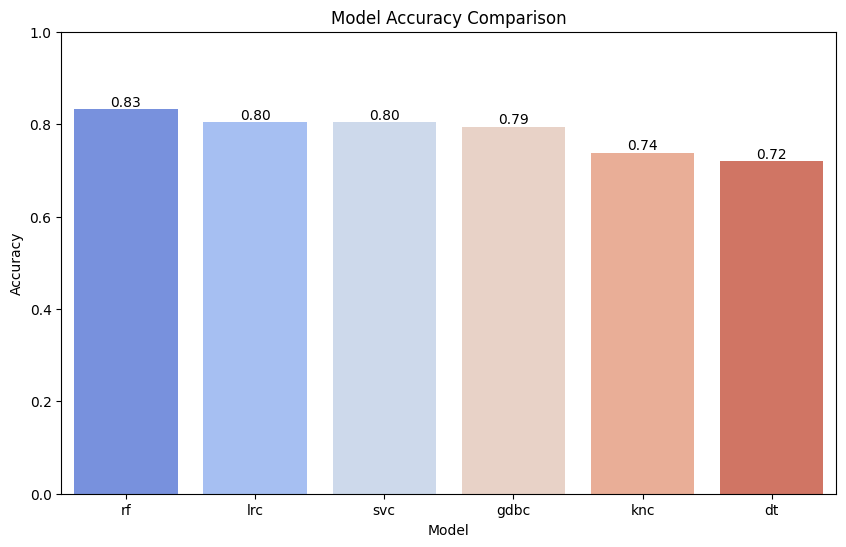

In [172]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=results_df, x='Model', y='ACC', palette='coolwarm')
# Format labels to two decimal places
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0, 1)
plt.show()


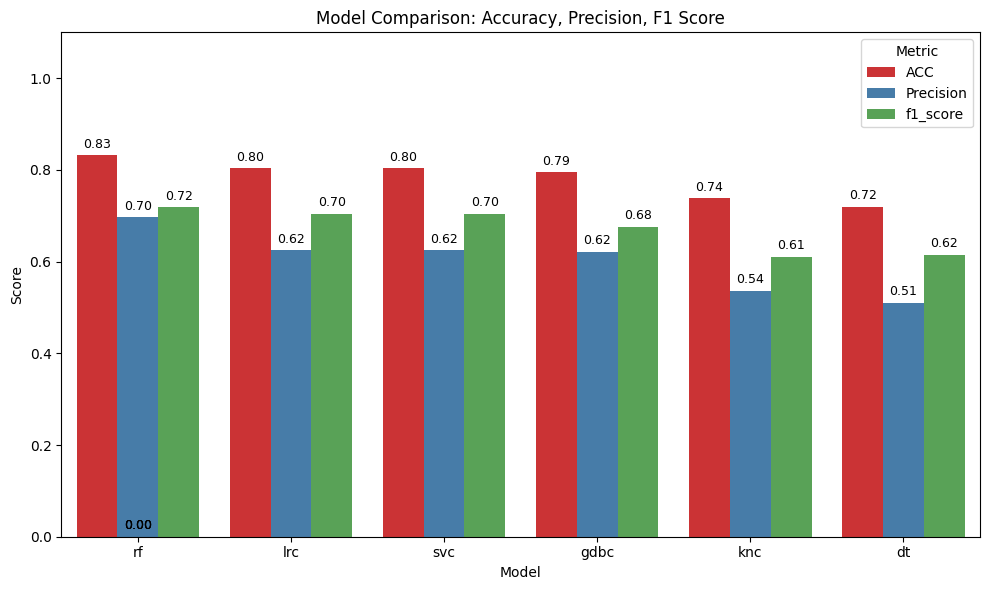

In [173]:

plt.figure(figsize=(10, 6))
metrics = ['ACC', 'Precision', 'f1_score']
results_melted = results_df.melt(id_vars='Model', value_vars=metrics, var_name='Metric', value_name='Score')

# Create barplot
ax = sns.barplot(data=results_melted, x='Model', y='Score', hue='Metric', palette='Set1')

# Add labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height + 0.01,
        f'{height:.2f}',
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.title('Model Comparison: Accuracy, Precision, F1 Score')
plt.ylim(0, 1.1)
plt.ylabel('Score')
plt.xlabel('Model')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

# Visualization Confusion Matrix for Random Forest

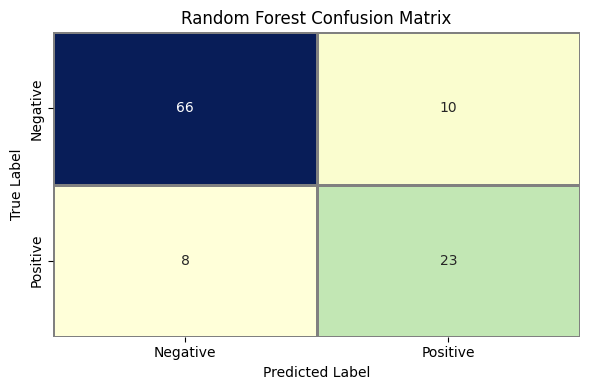

In [177]:
# Confusion matrix for the Random Forest model
conf_matrix_rf = [[66, 10],
                  [8, 23]]
# Class labels
labels = ['Negative', 'Positive']

# Plotting the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=labels, yticklabels=labels,
            cbar=False, linewidths=1, linecolor='gray')

plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()



### Correct Predictions: 66 negatives, 23 positives
### Misclassifications: 10 false positives, 8 false negatives
### Model Tendency: Strong at identifying negatives, slightly weaker on positives
### Implication: Good overall, but can benefit from reducing false positives/negatives for better balance
